In [2]:
import os
import glob2
import numpy as np
import random
import pandas as pd
import math

In [3]:
DATA_FD = "/workspace/nabang1010/STEAM/DoQuocDang_STEAM/DoQuocDang_STEAM/DATA/train_png"
DF_TRAIN = pd.read_csv("/workspace/nabang1010/STEAM/DoQuocDang_STEAM/DoQuocDang_STEAM/DATA/train.csv")

In [4]:
image_files = glob2.glob(os.path.join(DATA_FD, "*.png"))
len(image_files)

15000

In [5]:
DF_TRAIN

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
67909,936fd5cff1c058d39817a08f58b72cae,No finding,14,R1,NaN,NaN,NaN,NaN
67910,ca7e72954550eeb610fe22bf0244b7fa,No finding,14,R1,NaN,NaN,NaN,NaN
67911,aa17d5312a0fb4a2939436abca7f9579,No finding,14,R8,NaN,NaN,NaN,NaN
67912,4b56bc6d22b192f075f13231419dfcc8,Cardiomegaly,3,R8,771.0,979.0,1680.0,1311.0


In [6]:
df_abnormal = DF_TRAIN[DF_TRAIN["class_id"] != 14]
df_abnormal

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
5,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,R9,627.0,357.0,947.0,433.0
6,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,R17,1347.0,245.0,2188.0,2169.0
7,47ed17dcb2cbeec15182ed335a8b5a9e,Nodule/Mass,8,R9,557.0,2352.0,675.0,2484.0
...,...,...,...,...,...,...,...,...
67903,b53d1dd80e99ca6bcef9d592f65d3321,Pleural effusion,10,R9,240.0,1550.0,562.0,2001.0
67906,26d1d5a0ef2e692c6340e74859ffdc53,Pulmonary fibrosis,13,R10,1163.0,787.0,1338.0,941.0
67907,22672ab82c290c20b86863291e25ef6c,ILD,5,R9,299.0,664.0,794.0,1508.0
67908,db169d0be36123bd55b866d6aa73983b,Other lesion,9,R8,6.0,670.0,272.0,1736.0


In [7]:
df_normal = DF_TRAIN[DF_TRAIN["class_id"] == 14]
df_normal

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN
12,5550a493b1c4554da469a072fdfab974,No finding,14,R9,NaN,NaN,NaN,NaN
13,869f39afbdd8783b531530942eda8bad,No finding,14,R3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
67905,955f258cc29153f996ee6716218c1196,No finding,14,R8,NaN,NaN,NaN,NaN
67909,936fd5cff1c058d39817a08f58b72cae,No finding,14,R1,NaN,NaN,NaN,NaN
67910,ca7e72954550eeb610fe22bf0244b7fa,No finding,14,R1,NaN,NaN,NaN,NaN
67911,aa17d5312a0fb4a2939436abca7f9579,No finding,14,R8,NaN,NaN,NaN,NaN


In [8]:
list_image_abnormal = df_abnormal["image_id"].unique()
len(list_image_abnormal)

4394

In [9]:
list_image_normal = df_normal["image_id"].unique()
len(list_image_normal)

10606

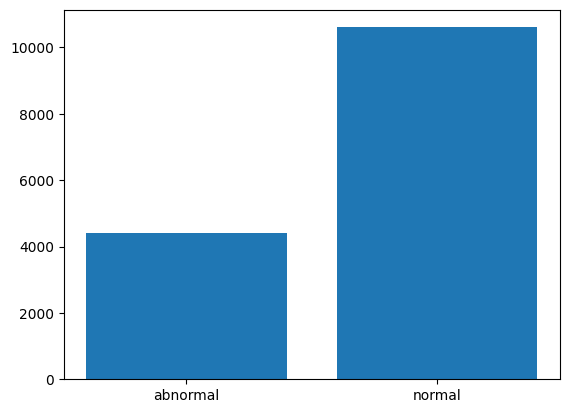

In [10]:
import matplotlib.pyplot as plt

# 
plt.bar(["abnormal", "normal"], [len(list_image_abnormal), len(list_image_normal)])
        
plt.show()


In [19]:

num_train = math.floor(len(list_image_normal) * 0.7)

rand_idx_train = np.random.choice(len(list_image_normal), num_train, replace=False)

list_image_normal_train = list_image_normal[rand_idx_train]

list_image_normal_val_test = np.delete(list_image_normal, rand_idx_train)

num_val = math.floor(len(list_image_normal_val_test) * 0.5)

rand_idx_val = np.random.choice(len(list_image_normal_val_test), num_val, replace=False)

list_image_normal_val = list_image_normal_val_test[rand_idx_val]

list_image_normal_test = np.delete(list_image_normal_val_test, rand_idx_val)


In [22]:
# train_fd_path = "/workspace/nabang1010/STEAM/LeGiaBach_STEAM/DATA/data_png/train/0"
# val_fd_path = "/workspace/nabang1010/STEAM/LeGiaBach_STEAM/DATA/data_png/val/0"
# test_fd_path = "/workspace/nabang1010/STEAM/LeGiaBach_STEAM/DATA/data_png/test/0"

# for image in list_image_normal_train:
#     os.system("cp {} {}".format(os.path.join(DATA_FD, image + ".png"), train_fd_path))

# for image in list_image_normal_val: 
#     os.system("cp {} {}".format(os.path.join(DATA_FD, image + ".png"), val_fd_path))

# for image in list_image_normal_test:
#     os.system("cp {} {}".format(os.path.join(DATA_FD, image + ".png"), test_fd_path))

In [12]:
import albumentations as A

transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=15, p=0.5),
    
    A.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03, p=0.5),

    A.RandomGamma(gamma_limit=(80, 120), p=0.5)]
)

In [24]:
list_image_abnormal = df_abnormal["image_id"].unique()
list_image_abnormal

array(['9a5094b2563a1ef3ff50dc5c7ff71345',
       '051132a778e61a86eb147c7c6f564dfe',
       '1c32170b4af4ce1a3030eb8167753b06', ...,
       '380d07a94cc4b012812119370de47192',
       '52951d7de2485aba8ed62629eee4d254',
       '1224f07d895107573588225f692e94f9'], dtype=object)

In [27]:
len(list_image_normal)/len(list_image_abnormal)

2.413746017296313

In [29]:
import cv2
import uuid

In [30]:
abnormal_fd ="/workspace/nabang1010/STEAM/LeGiaBach_STEAM/DATA/abnormal_png"

In [32]:
# for image_abnormal_file in list_image_abnormal:
#     image_abnormal_path = os.path.join(DATA_FD, image_abnormal_file + ".png")
#     image_abnormal = cv2.imread(image_abnormal_path)
#     cv2.imwrite(os.path.join(abnormal_fd, image_abnormal_file + ".png"), image_abnormal)
#     image_abnormal = cv2.cvtColor(image_abnormal, cv2.COLOR_BGR2RGB)
#     for i in range(2):
#         augmented = transform(image=image_abnormal)
#         image_aug = augmented["image"]
#         cv2.imwrite(os.path.join(abnormal_fd, str(uuid.uuid4().hex) + ".png"), image_aug)

In [13]:
import uuid



'5684e67cc122414ba269b5f916e1bf69'

In [16]:
import os
import math
import numpy as np
from tqdm import tqdm


In [2]:
abnormal_png_fd = "/workspace/nabang1010/STEAM/LeGiaBach_STEAM/DATA/abnormal_png"
list_image_abnormal = os.listdir(abnormal_png_fd)
list_image_abnormal

['b172b8ceb7ce4663aca50cacf233f88f.png',
 '12e400b388e44c77a0c914b0a71fa427.png',
 'dcc57923d4ae4965a5741a37da0b587d.png',
 '1ec2c0ec570841f3ba55e9eed1d03580.png',
 '0187da5fd71c7a2917346bf12a67bbe4.png',
 '48dc1dded2d2403c8a2dc06e7f1f2ebe.png',
 'd7a89cf80b0b4706ab1574b87ac97038.png',
 'f98fe6a9c85c4e39896bcb3a33345196.png',
 'fef3d7a7a9474ee2b6a27e1fbbbb2685.png',
 '5b05df19287bc68ead3011b06492d5e9.png',
 'd08434a383754797988fd3bdff24406d.png',
 '804bfe2d3e6b0b8a34541a276d7cd7d6.png',
 'bc5599c5f55e4dc8bd0688e21b0039eb.png',
 'c1ca66539955f94f6dbd74fb5ba7208d.png',
 '7d5f17589cfc4e588fd6a84551b7e396.png',
 'ec6ec12533b8495bb7344d8895dd4f05.png',
 '8065d05befc24e5b991a6197882e0375.png',
 '1d74c92a1e6adfcb63162f9b72edfc56.png',
 '50f315c754b3530ac3c9bac3e96b22ac.png',
 '1502a97e01c24d76a5f0738f3ea1681f.png',
 'b5d9f78742fb4a7c829a00cab9723695.png',
 '0ea4221d568ab487af7c433a3df6307e.png',
 '044d73759a554b10ad57e3c30d1a6e04.png',
 'd6d95f11e158dafc5fe2955b81192f51.png',
 '38d4443729e3b2

In [3]:
len(list_image_abnormal)

12610

In [10]:
list_image_abnormal = np.array(list_image_abnormal)

In [11]:


num_train_abnormal = math.floor(len(list_image_abnormal) * 0.7)

rand_idx_train_abnormal = np.random.choice(len(list_image_abnormal), num_train_abnormal, replace=False)

list_image_abnormal_train = list_image_abnormal[rand_idx_train_abnormal]

list_image_abnormal_val_test = np.delete(list_image_abnormal, rand_idx_train_abnormal)

num_val_abnormal = math.floor(len(list_image_abnormal_val_test) * 0.5)

rand_idx_val_abnormal = np.random.choice(len(list_image_abnormal_val_test), num_val_abnormal, replace=False)

list_image_abnormal_val = list_image_abnormal_val_test[rand_idx_val_abnormal]

list_image_abnormal_test = np.delete(list_image_abnormal_val_test, rand_idx_val_abnormal)






In [15]:
list_image_abnormal_test

array(['b172b8ceb7ce4663aca50cacf233f88f.png',
       '12e400b388e44c77a0c914b0a71fa427.png',
       '1ec2c0ec570841f3ba55e9eed1d03580.png', ...,
       '2e426ab34288f1f7edba1c73feb45a05.png',
       'b73a5977ed43449fa794d251bff23b73.png',
       '2aeb88a0d7394443e815a4b3e15399d4.png'], dtype='<U36')

In [17]:
train_fd_path = "/workspace/nabang1010/STEAM/LeGiaBach_STEAM/DATA/data_png/train/1"
val_fd_path = "/workspace/nabang1010/STEAM/LeGiaBach_STEAM/DATA/data_png/val/1"
test_fd_path = "/workspace/nabang1010/STEAM/LeGiaBach_STEAM/DATA/data_png/test/1"

for image in tqdm(list_image_abnormal_train):
    os.system("cp {} {}".format(os.path.join(abnormal_png_fd, image), train_fd_path))

for image in tqdm(list_image_abnormal_val): 
    os.system("cp {} {}".format(os.path.join(abnormal_png_fd, image), val_fd_path))

for image in tqdm(list_image_abnormal_test):
    os.system("cp {} {}".format(os.path.join(abnormal_png_fd, image), test_fd_path))

100%|██████████| 1892/1892 [04:15<00:00,  7.41it/s]
